# Kaggle: Telco Customer Churn

1. Demographic:

   a. Which 2 demographics have proven to be the most popular with the telco brand

   b. If the marketing team wanted to increase customer retention, to whom should they target their advertisements?

2. Services:

   a. Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in  explaining your analysis)

   b. If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

3. Payment: (Use visualizations in explaing your analysis)
   
   a. If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:

   i.   Basic
   ii.  Plus
   iii. Premium

   b. Should the company strictly go paperless for their monthly billings as a technique of keeping thier customers and why?

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
#Find any null values
nan_df = df[df.isna().any(axis = 1)]
nan_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


# QUESTION ONE

Demographics is Gender, SeniorCitizen, Partner, Dependents

In [5]:
churn_no = df[df['Churn'] == 'No']
churn_yes = df[df['Churn'] == 'Yes']

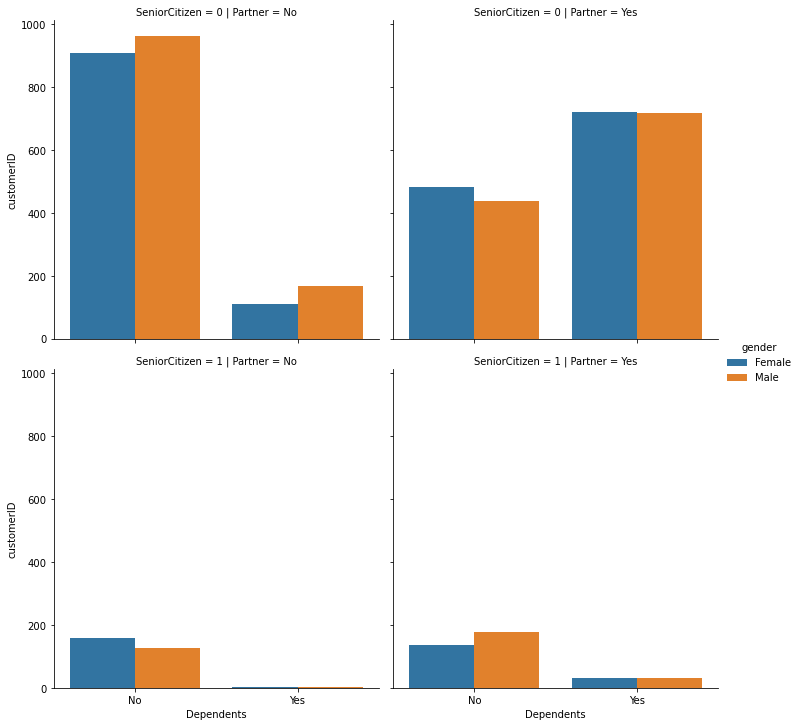

In [6]:
demograhics_no = churn_no.groupby(['gender', 'SeniorCitizen', 'Partner', 'Dependents'])['customerID'].count().reset_index()
sns.catplot(data = demograhics_no, x = 'Dependents', y = 'customerID', row = 'SeniorCitizen', col = 'Partner',  hue = 'gender', kind = 'bar')

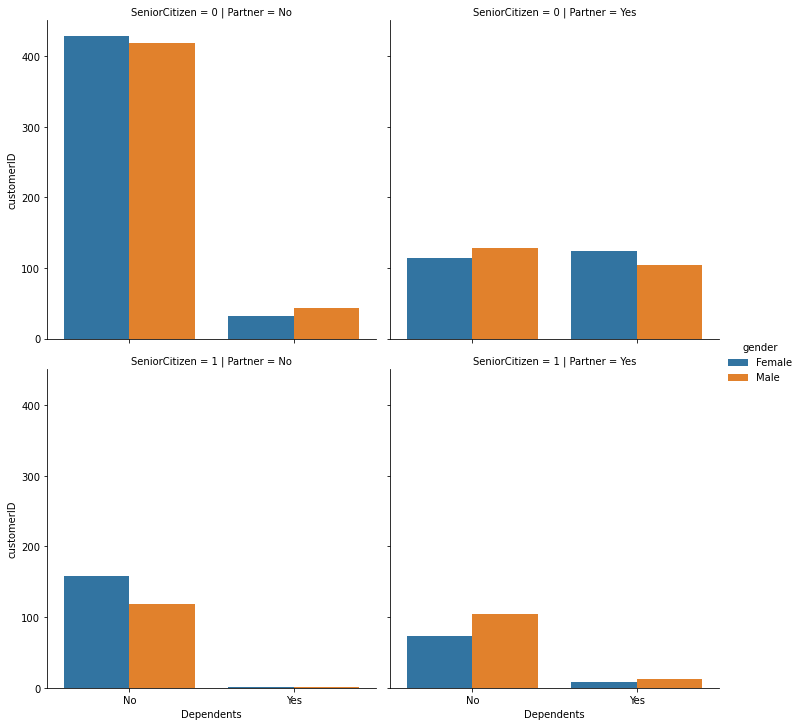

In [8]:
demograhics_no = churn_yes.groupby(['gender', 'SeniorCitizen', 'Partner', 'Dependents'])['customerID'].count().reset_index()
sns.catplot(data = demograhics_no, x = 'Dependents', y = 'customerID', row = 'SeniorCitizen', col = 'Partner',  hue = 'gender', kind = 'bar')

In [9]:
df.groupby(['gender', 'SeniorCitizen', 'Dependents','Partner', 'Churn'])['Churn'].count().unstack()

Churn                                     No  Yes
gender SeniorCitizen Dependents Partner          
Female 0             No         No       909  429
                                Yes      482  114
                     Yes        No       110   32
                                Yes      720  124
       1             No         No       159  158
                                Yes      136   73
                     Yes        No         2    1
                                Yes       31    8
Male   0             No         No       963  418
                                Yes      439  128
                     Yes        No       168   43
                                Yes      717  105
       1             No         No       126  118
                                Yes      176  105
                     Yes        No         4    1
                                Yes       32   12

a. Both single, young to mid aged, ie. male and female without dependent are the most popular with the telco brand. Yet, they are the majority of those churning. 

b.The telco brand should target these two demographics in their marketing adverts.

# QUESTION TWO

Services are PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

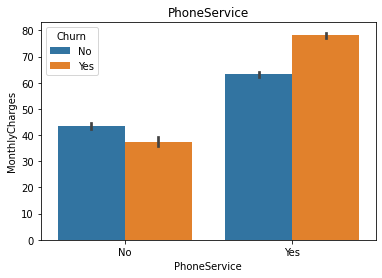

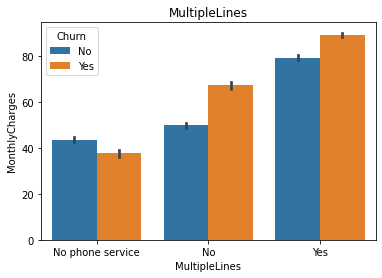

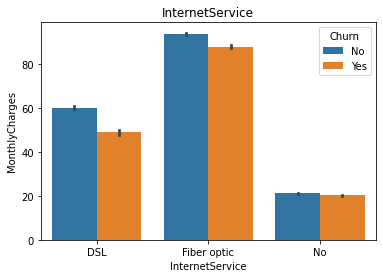

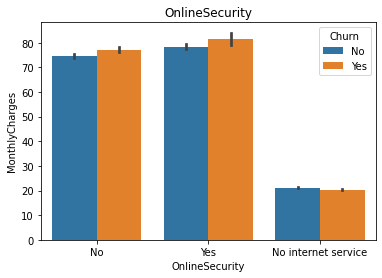

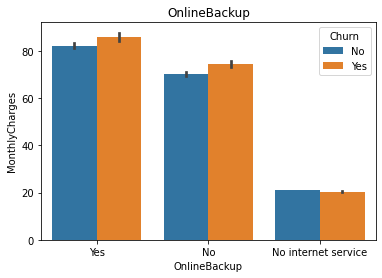

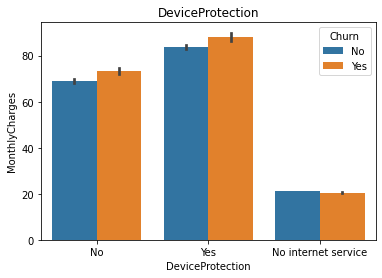

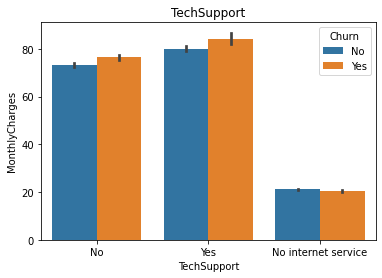

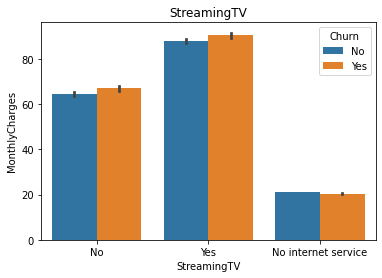

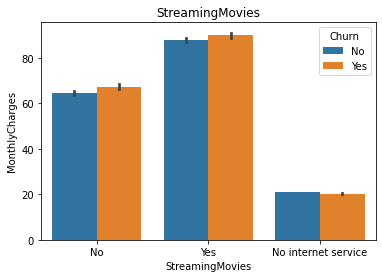

In [13]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


for serv in services:
    #plt.figure(figsize = (20, 10))
    sns.barplot(x = serv, y = 'MonthlyCharges', data = df, hue = 'Churn')
    plt.title(serv)
    plt.show()

### a. Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in  explaining your analysis)

Answer:
The three services that will contribute to monthly Charges resulting to customers churning are MultipleLines, StreamingTV and Streaming Movies


In [21]:
# churn vs phone vs contract
df.groupby(['PhoneService', 'Contract', 'Churn'])['Churn'].count().unstack()

Churn                          No   Yes
PhoneService Contract                  
No           Month-to-month   223   153
             One year         131    14
             Two year         158     3
Yes          Month-to-month  1997  1502
             One year        1176   152
             Two year        1489    45

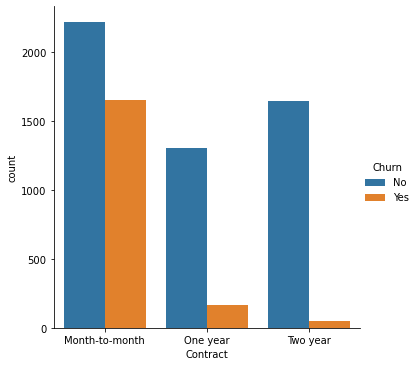

In [20]:
sns.catplot(x="Contract",hue="Churn", data=df, kind="count")

### b. If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

Answer:
Two years contract for customer retention

# QUESTION THREE

In [23]:
#Get a dataframe where all customers didn't churn 
noChurn = df[df['Churn']== 'No']
noChurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


In [24]:
noChurn['MonthlyCharges'].describe()

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64

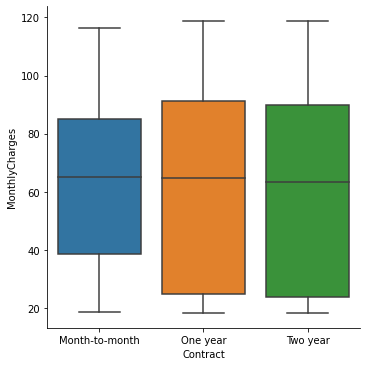

In [25]:
#Basic, Plus and Premium
sns.catplot(x="Contract", y="MonthlyCharges", data=noChurn, kind="box")

### a. If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning: i.   Basic ii.  Plus iii. Premium


Answer: 
    If Telco streamlined its services into 3 bouquets, the monthly prices appropriate for Basic, Plus and Premium 
    would be the 25th, 50th and 75th percentiles i.e. 25.10, 64.425 and 88.40 respectively 

   

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

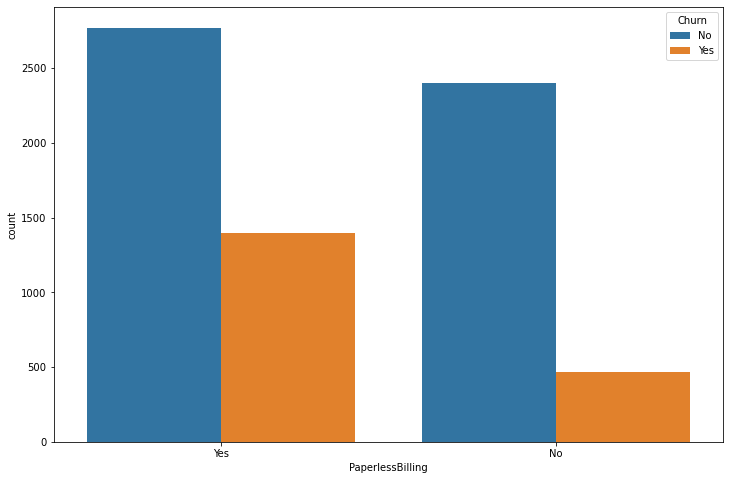

In [26]:
plt.figure(figsize = (12, 8))
sns.countplot(data = df, x = 'PaperlessBilling', hue = 'Churn')

In [29]:
#Paperless vs Churn vs tenure
paperlessBilling = df.groupby(['PaperlessBilling', 'Churn'])['tenure'].mean().unstack()
paperlessBilling 

Churn,No,Yes
PaperlessBilling,,
No,35.420308,15.633262
Yes,39.434139,18.765000


<AxesSubplot:xlabel='PaperlessBilling'>

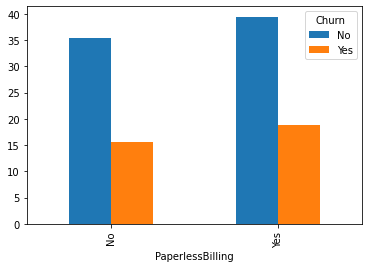

In [30]:
paperlessBilling .plot(kind = 'bar')

### b. Should the company strictly go paperless for their monthly billings as a technique of keeping thier customers and why?

Answer:Yes, the company should go for paperless billings because when you compare the churn to the tenure, on average, customers who are billed electronically stay longer i.e. 39.4 vs 35.2 days for those that didn't churn and 18.8 vs 15.6 days for those that churned.